In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  


In [3]:
train_data = pd.read_csv("../dataset/train_processed_data.csv")
print(train_data.shape)

(1000, 8)


In [4]:
train_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,2,0,0,72,72,74
1,0,2,3,0,1,69,90,88
2,0,1,1,0,0,90,95,93
3,1,0,0,1,0,47,57,44
4,1,2,3,0,0,76,78,75


In [5]:
data = train_data.iloc[:, 5:].values
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

In [6]:
data

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

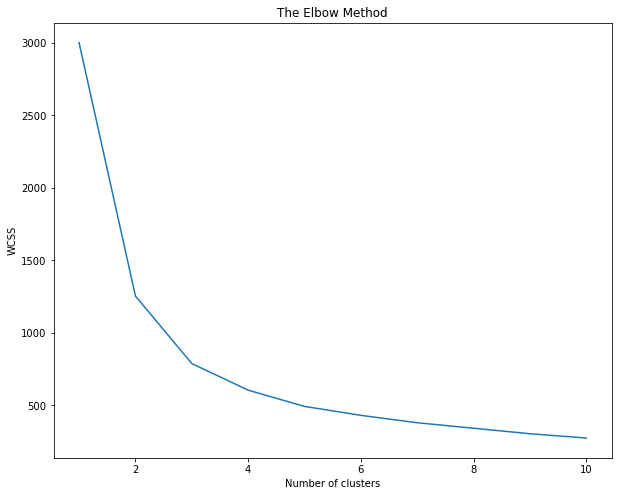

In [7]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# 1) By Looking at the elbo curve it looks like we can set it as 2 clusters

In [9]:
# Fitting K-Means to the dataset
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
train_data['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(train_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
cluster,,,,,,,,
1,0.6,1.9,2.9,0.5,0.2,53.7,56.2,54.7
2,0.4,2.4,2.5,0.3,0.4,75.8,79.3,78.5


In [10]:
train_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,0,1,2,0,0,72,72,74,2
1,0,2,3,0,1,69,90,88,2
2,0,1,1,0,0,90,95,93,2
3,1,0,0,1,0,47,57,44,1
4,1,2,3,0,0,76,78,75,2


In [11]:
clustergroup = train_data.groupby('cluster').describe()

In [12]:
pd.pandas.set_option('display.max_columns',None)

In [13]:
clustergroup

gender                                              race/ethnicity  \
         count      mean       std  min  25%  50%  75%  max          count   
cluster                                                                      
1        440.0  0.550000  0.498060  0.0  0.0  1.0  1.0  1.0          440.0   
2        560.0  0.428571  0.495314  0.0  0.0  0.0  1.0  1.0          560.0   

                                                      \
             mean       std  min  25%  50%  75%  max   
cluster                                                
1        1.947727  1.157129  0.0  1.0  2.0  3.0  4.0   
2        2.351786  1.126759  0.0  2.0  2.0  3.0  4.0   

        parental level of education                                          \
                              count      mean       std  min  25%  50%  75%   
cluster                                                                       
1                             440.0  2.877273  1.764864  0.0  2.0  3.0  4.0   
2                             560.0  2.475000  1.762078  0.0  1.0  3.0  4.0   

              lunch                                               \
         max  count      mean       std  min  25%  50%  75%  max   
cluster                                                            
1        5.0  440.0  0.481818  0.500238  0.0  0.0  0.0  1.0  1.0   
2        5.0  560.0  0.255357  0.436452  0.0  0.0  0.0  1.0  1.0   

        test preparation course                                                \
                          count      mean       std  min  25%  50%   75%  max   
cluster                                                                         
1                         440.0  0.250000  0.433506  0.0  0.0  0.0  0.25  1.0   
2                         560.0  0.442857  0.497168  0.0  0.0  0.0  1.00  1.0   

        math score                                                        \
             count       mean        std   min   25%   50%    75%    max   
cluster                                                                    
1            440.0  53.706818  10.908731   0.0  48.0  55.0  61.25   76.0   
2            560.0  75.817857  10.096442  51.0  68.0  75.0  82.00  100.0   

        reading score                                                      \
                count       mean       std   min   25%   50%   75%    max   
cluster                                                                     
1               440.0  56.225000  9.437569  17.0  51.0  58.0  63.0   73.0   
2               560.0  79.339286  8.689386  60.0  73.0  78.0  85.0  100.0   

        writing score                                                       
                count       mean        std   min   25%   50%   75%    max  
cluster                                                                     
1               440.0  54.743182  10.266603  10.0  49.0  56.0  62.0   75.0  
2               560.0  78.512500   8.991540  61.0  72.0  77.0  84.0  100.0

In [15]:
# re maping the Labeled Data
train_data['gender']         = train_data['gender'].map({1:'male', 0:'female'})
train_data['race/ethnicity'] = train_data['race/ethnicity'].map({0:'group A',1:'group B',2:'group C',3:'group D',4:'group E'})
train_data['parental level of education'] = train_data['parental level of education'].map({2:"bachelor's degree",1:"master's degree",0:"associate's degree",3:'some college',4:'high school',5:'some high school'})
train_data['lunch'] = train_data['lunch'].map({0:'standard',1:'free/reduced'})
train_data['test preparation course'] = train_data['test preparation course'].map({0:'none',1:'completed'})

In [16]:
train_data.to_csv('../dataset/train_model_processed_data.csv',index=False)

In [17]:
train_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,2
